In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

Matplotlib is building the font cache; this may take a moment.


In [2]:
# %%
digits = datasets.load_digits()

In [4]:
#
# Tamaño del dataset
#
digits.images.shape

(1797, 8, 8)

In [5]:
#
# Ejemplo de una imagen (data)
#
digits.images[0, :, :]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
# %%
#
# Clases
#
set(digits.target)

{np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)}

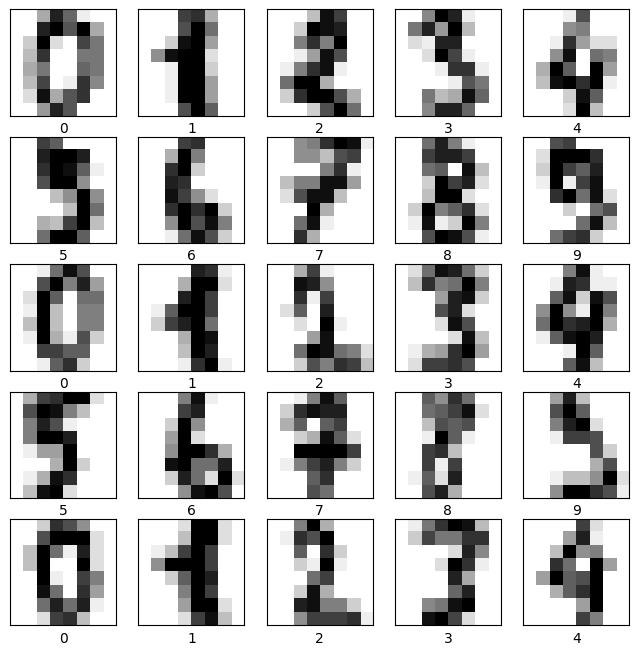

In [7]:
# %%
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(digits.images[i], cmap=plt.cm.binary)
    plt.xlabel(digits.target[i])
plt.show()

In [9]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data.shape#


(1797, 64)

In [10]:

X_train, X_test, y_train, y_test = train_test_split(
    data,
    digits.target,
    test_size=0.5,
    shuffle=False,
)

In [11]:
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(max_iter=1000)
estimator

estimator.fit(
    X_train,
    y_train,
)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [12]:
estimator.intercept_


array([ 0.00050528, -0.07018709,  0.00037916,  0.02613521,  0.00701811,
       -0.01338731, -0.00226943,  0.01159971,  0.02821907,  0.01198729])

In [13]:
estimator.coef_

array([[ 0.00000000e+00, -5.93776303e-03, -3.69268945e-02,
         6.09208455e-02,  2.47892965e-02, -2.45145463e-02,
        -7.79553881e-02, -8.26445639e-03, -1.60076265e-05,
        -2.45959133e-02, -3.72186650e-02,  6.13663228e-02,
         4.58239062e-02,  6.85658684e-02,  7.04746578e-03,
        -8.43757378e-03, -7.03893126e-06,  1.67993483e-02,
         1.02526397e-01,  2.41248067e-03, -1.05284189e-01,
         7.99168584e-02,  1.08719150e-01, -2.20087180e-03,
        -7.03874441e-06,  4.48629401e-02,  1.26594888e-01,
        -1.37796330e-01, -3.43863994e-01, -1.82047754e-02,
         1.83089157e-01, -7.11220948e-06,  0.00000000e+00,
         1.06121200e-01,  8.44651274e-02, -1.98984301e-01,
        -2.49202732e-01, -1.03561609e-02,  1.22260932e-01,
         0.00000000e+00, -4.98650465e-05,  4.16372485e-02,
         1.22064288e-01, -2.05490891e-02, -1.22118427e-01,
         7.62758709e-02,  6.68656022e-02, -2.14036873e-05,
        -4.14568965e-05, -3.94910991e-02,  9.95123889e-0

In [14]:
from sklearn.metrics import accuracy_score

#
# Muestra de entrenamiento
#
accuracy_score(y_true=y_train, y_pred=estimator.predict(X_train))

1.0

In [15]:

#
# Muestra de prueba
#
predictions = estimator.predict(X_test)
predicted_proba = estimator.predict_proba(X_test)

accuracy_score(y_true=y_test, y_pred=predictions)



0.92880978865406

Confusion matrix:
[[84  0  0  0  1  0  3  0  0  0]
 [ 0 82  0  1  0  1  0  0  2  5]
 [ 0  0 84  2  0  0  0  0  0  0]
 [ 0  0  0 76  0  4  0  2  7  2]
 [ 0  0  0  0 84  0  4  0  0  4]
 [ 0  2  0  0  0 85  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  1  1  0 85  0  2]
 [ 0  3  1  0  0  4  1  0 79  0]
 [ 1  0  0  2  0  2  0  0  1 86]]


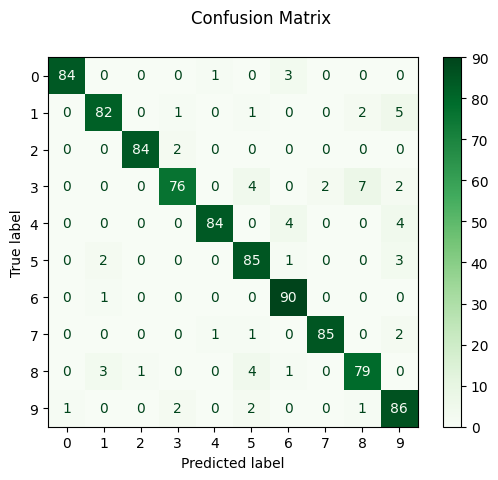

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    predictions,
    cmap="Greens",
)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")